In [1]:
!pip install folium==0.5.0

In [2]:
!pip install pandas scipy scikit-learn matplotlib flask

In [3]:
!pip install pydotplus

In [4]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.7.0)


In [5]:
!conda install -c glemaitre imbalanced-learn

Solving environment: | 
  - anaconda::openssl-1.1.1h-h7b6447c_0, defaults::ca-certificates-2020.7.22-0, defaults::certifi-2020.6.20-py36_0
  - anaconda::certifi-2020.6.20-py36_0, anaconda::openssl-1.1.1h-h7b6447c_0, defaults::ca-certificates-2020.7.22-0
  - anaconda::ca-certificates-2020.7.22-0, anaconda::openssl-1.1.1h-h7b6447c_0, defaults::certifi-2020.6.20-py36_0
  - anaconda::ca-certificates-2020.7.22-0, anaconda::certifi-2020.6.20-py36_0, anaconda::openssl-1.1.1h-h7b6447c_0
  - anaconda::ca-certificates-2020.7.22-0, defaults::certifi-2020.6.20-py36_0, defaults::openssl-1.1.1h-h7b6447c_0
  - anaconda::ca-certificates-2020.7.22-0, anaconda::certifi-2020.6.20-py36_0, defaults::openssl-1.1.1h-h7b6447c_0
  - defaults::ca-certificates-2020.7.22-0, defaults::certifi-2020.6.20-py36_0, defaults::openssl-1.1.1h-h7b6447c_0
  - anaconda::certifi-2020.6.20-py36_0, defaults::ca-certificates-2020.7.22-0, defaults::openssl-1.1.1h-h7b6447cdone

## Package Plan ##

  environment location: /opt/cond

In [6]:
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.7.22  |                0         132 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    ------------------------------------------------------------
                                           Total:         291 KB

The following packages will be UPDATED:

    ca-certificates: 2020.7.22-0      --> 2020.7.22-0      anaconda
    certifi:         2020.6.20-py36_0 --> 2020.6.20-py36_0 anaconda


ca-certificates-2020 | 132 KB    | ##################################### | 100% 
certifi-2020.6.20    | 160 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import pydotplus
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import folium
import webbrowser
from folium import plugins
from imblearn.over_sampling import SMOTE

from botocore.client import Config
import ibm_boto3

In [12]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3e9d503e21aa4b2c9c70e4be7e0e5398 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ouXW1Yr170srJAuRFoVCYrr9oOMEeP6ZHv0Z55gOkWUt',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_3e9d503e21aa4b2c9c70e4be7e0e5398.get_object(Bucket='visuals-donotdelete-pr-pxinn0urvukrkl',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [13]:
severity_code = df_data_1['SEVERITYCODE'].values

In [14]:
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

In [15]:
df_data_1 ["SEVERITYCODE"] = severity_code

In [16]:
descriptive_stats= df_data_1.describe(include="all")

In [19]:
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

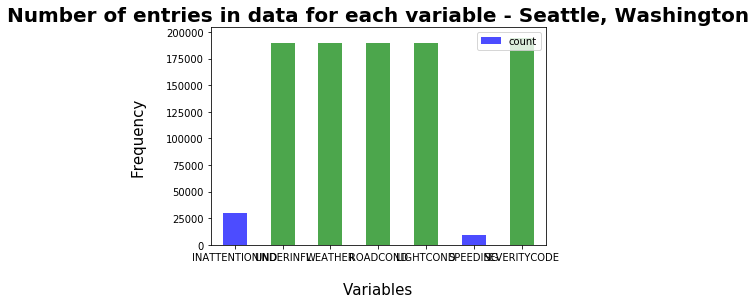

In [20]:
color_yo=['blue','green','green','green','green','blue','green']
descriptive_stats_plot.plot(kind='bar',alpha=0.70,color=[color_yo])
plt.title('Number of entries in data for each variable - Seattle, Washington', fontsize=20, fontweight='bold')
plt.xlabel("Variables",fontsize=15,labelpad=20)
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xticks(rotation=360)
plt.show()

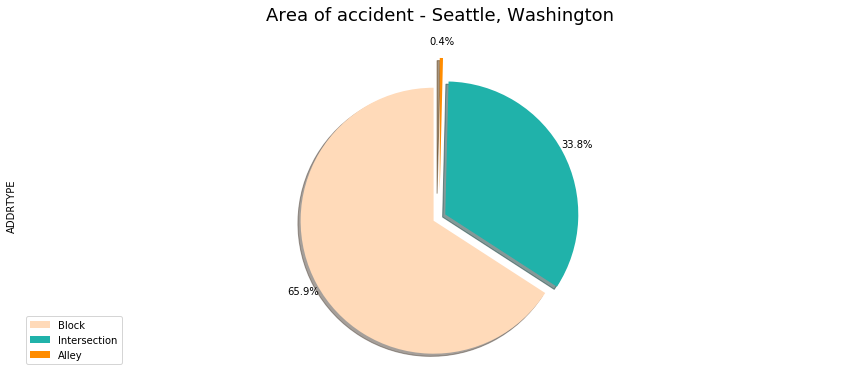

In [21]:
explode_list = [0.05, 0.05, 0.2]
color_list=['peachpuff','lightseagreen','darkorange']
addtype=df_data_1['ADDRTYPE'].value_counts()

addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            explode=explode_list)


plt.title('Area of accident - Seattle, Washington', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='lower left')

plt.show()

In [22]:
df_data_1['INCKEY'].nunique()
df_data_1["INATTENTIONIND"].replace("Y", 1, inplace=True)
df_data_1["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df_data_1["UNDERINFL"].replace("N", 0, inplace=True)
df_data_1["UNDERINFL"].replace("Y", 1, inplace=True)
df_data_1["SPEEDING"].replace("Y", 1, inplace=True)
df_data_1["SPEEDING"].replace(np.nan, 0, inplace=True)
df_data_1["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df_data_1["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df_data_1["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df_data_1["LIGHTCOND"].replace("Dusk", 1, inplace=True)
df_data_1["LIGHTCOND"].replace("Dawn", 1, inplace=True)
df_data_1["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
df_data_1["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
df_data_1["LIGHTCOND"].replace("Other","Unknown", inplace=True)
df_data_1["WEATHER"].replace("Clear", 0, inplace=True)
df_data_1["WEATHER"].replace("Raining", 3, inplace=True)
df_data_1["WEATHER"].replace("Overcast", 1, inplace=True)
df_data_1["WEATHER"].replace("Other", "Unknown", inplace=True)
df_data_1["WEATHER"].replace("Snowing", 3, inplace=True)
df_data_1["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
df_data_1["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
df_data_1["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
df_data_1["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
df_data_1["WEATHER"].replace("Partly Cloudy", 1, inplace=True)
df_data_1["ROADCOND"].replace("Dry", 0, inplace=True)
df_data_1["ROADCOND"].replace("Wet", 2, inplace=True)
df_data_1["ROADCOND"].replace("Ice", 2, inplace=True)
df_data_1["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
df_data_1["ROADCOND"].replace("Other", "Unknown", inplace=True)
df_data_1["ROADCOND"].replace("Standing Water", 2, inplace=True)
df_data_1["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
df_data_1["ROADCOND"].replace("Oil", 2, inplace=True)


In [23]:
selected_columns=df_data_1[["X","Y","INCKEY","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
feature_df=selected_columns.copy()
feature_df.dropna(axis=0,how='any',inplace=True)
feature_stats=feature_df.describe()

np.count_nonzero(feature_df['UNDERINFL'])
lightcondsize = feature_df ["LIGHTCOND"].size
featureinlightcond = feature_df ['LIGHTCOND'] == 'Unknown'

lightcond = feature_df['LIGHTCOND']
lightcond = lightcond.values
lightcond = lightcond[featureinlightcond]

lightcond[0:9036]=0
lightcond[9036:13417]=1
lightcond[13417:13961]=2

feature_df.loc [feature_df.LIGHTCOND == "Unknown", 'LIGHTCOND'] = lightcond

feature_df["LIGHTCOND"]=feature_df["LIGHTCOND"].astype(int)

In [24]:
roadcondsize = feature_df ["ROADCOND"].size

featureinroadcond = feature_df ['ROADCOND'] == 'Unknown'

roadcond = feature_df['LIGHTCOND']
roadcond = roadcond.values
roadcond = roadcond[featureinroadcond]

roadcond[0:9954]=0
roadcond[9954:10040]=1
roadcond[10040:15163]=2

feature_df.loc[feature_df.ROADCOND == "Unknown", 'ROADCOND'] = roadcond
feature_df["ROADCOND"]=feature_df["ROADCOND"].astype(int)

weathersize = feature_df ["WEATHER"].size

featureinweather = feature_df ['WEATHER'] == 'Unknown'

weather = feature_df['WEATHER']
weather = weather.values
weather = weather[featureinweather]

weather[0:10151]=0
weather[10151:12683]=1
weather[12683:12742]=2
weather[12742:15864]=3

feature_df.loc[feature_df.WEATHER == "Unknown", 'WEATHER'] = weather
feature_df["WEATHER"]=feature_df["WEATHER"].astype(int)


In [25]:
feature_df["SPEEDING"]=feature_df["SPEEDING"].astype(int)
feature_df["INATTENTIONIND"]=feature_df["INATTENTIONIND"].astype(int)
feature_df["UNDERINFL"]=feature_df["UNDERINFL"].astype(int)

In [26]:
X=feature_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=feature_df[["SEVERITYCODE"]].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (128916, 6) (128916, 1)
Test set: (55251, 6) (55251, 1)


In [29]:
os = SMOTE (random_state=0)
os_data_X, os_data_y= os.fit_sample(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
limit = 100005
reduced_df = feature_df.iloc [0:limit:5, 0:]

In [31]:
seattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=10)

In [32]:
incidents = plugins.MarkerCluster().add_to(seattle_map)

In [33]:
for lat, lng, label, in zip(reduced_df.Y, reduced_df.X, reduced_df.SEVERITYCODE):
    folium.Marker(
    location=[lat, lng],
    popup=label,
    icon=None
    ).add_to(incidents)
seattle_map.add_child(incidents)

AttributeError: 'int' object has no attribute 'get_name'

In [34]:
seattle_map
seattle_map.save("seattlemap.html")
webbrowser.open("seattlemap.html")

False

In [35]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth=6)
DT.fit(os_data_X,os_data_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
yhatDT = DT.predict(X_test)

In [37]:
print('Accuracy score for Decision Tree = ', accuracy_score(yhatDT, y_test))

Accuracy score for Decision Tree =  0.5758628803098587


In [38]:
print('Confusion Matrix - Decision Tree')
print(pd.crosstab(y_test.ravel(), yhatDT.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

print(classification_report(yhatDT,y_test))

Confusion Matrix - Decision Tree
Predicted      0      1    All
True                          
0          24433  14012  38445
1           9422   7384  16806
All        33855  21396  55251
             precision    recall  f1-score   support

          0       0.64      0.72      0.68     33855
          1       0.44      0.35      0.39     21396

avg / total       0.56      0.58      0.56     55251



In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [40]:
cnf_matrix = confusion_matrix(y_test, yhatDT, labels=[1,0])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[ 7384  9422]
 [14012 24433]]


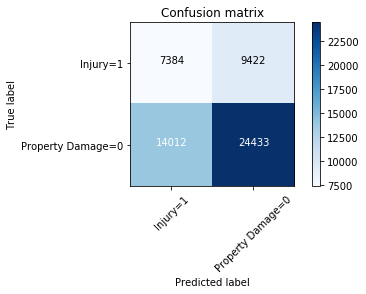

In [41]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')


In [42]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(os_data_X,os_data_y)

yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

print(log_loss(y_test, yhat_prob))

print ("Accuracy", accuracy_score(yhatLR,y_test))
print (classification_report(y_test, yhatLR))

cnf_matrix = confusion_matrix(y_test, yhatLR, labels=[1,0])
np.set_printoptions(precision=2)


0.6888089240138977
Accuracy 0.5888219217751715
             precision    recall  f1-score   support

          0       0.72      0.67      0.69     38445
          1       0.35      0.41      0.38     16806

avg / total       0.61      0.59      0.60     55251



Confusion matrix, without normalization
[[ 6846  9960]
 [12758 25687]]


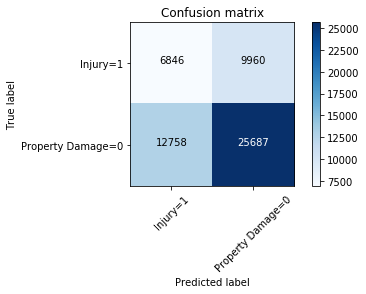

In [43]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')